# Prediction:- Has the client subscribed a term deposit? (YES/NO)

Importing Required Libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the BankMarketing_test.csv file.

In [15]:
train_df = pd.read_csv("BankMarketing_train.csv")
train_df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Understanding the data and exploring the Features.

In [16]:
train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [17]:
train_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [18]:
#To check the shape and columns of the dataset
print("The dimension of the dataset",train_df.shape)
print("The column headers of the dataset",train_df.columns)

The dimension of the dataset (31647, 18)
The column headers of the dataset Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [19]:
#Checking Datatypes are matching to the dataset or not.
train_df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [20]:
train_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
#Checking unique values of categorical features.

In [22]:
print(train_df['job'].value_counts())
print(train_df['marital'].value_counts())
print(train_df['education'].value_counts())

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


EDA:(Data Exploratory Analysis)

In [23]:
#Visualizing the distribution of the target variable.

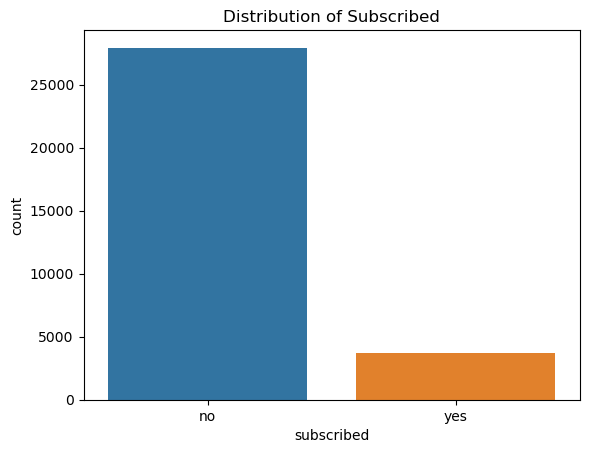

In [24]:
sns.countplot(x='subscribed', data=train_df)
plt.title('Distribution of Subscribed')
plt.show()

In [25]:
#Exploring relationships between features and the target variable.

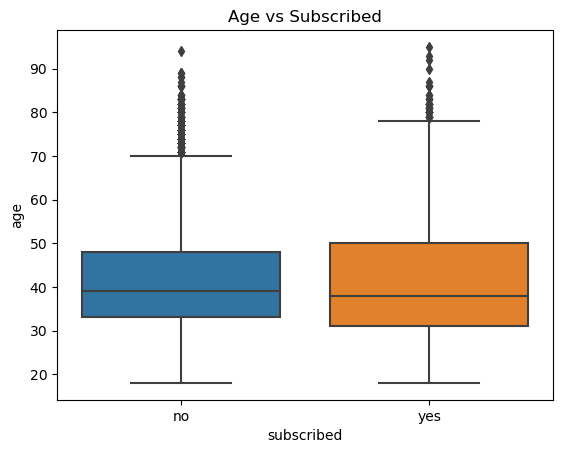

In [26]:
sns.boxplot(x='subscribed', y='age', data=train_df)
plt.title('Age vs Subscribed')
plt.show()

Handle Noise.

In [27]:
#Checking for the missing values.

In [28]:
train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Okay, there is no null values in the dataset.

In [31]:
#Handle outliers using techniques like winsorization or removing extreme values.

In [32]:
from scipy.stats.mstats import winsorize
train_df['duration'] = winsorize(train_df['duration'], limits=[0.05, 0.05])

Feature Engineering.

In [33]:
#Creating a new feature 'total_contacts' by adding 'campaign' and 'previous'

In [34]:
train_df['total_contacts'] = train_df['campaign'] + train_df['previous']

Handle Categorical Data.

In [35]:
encoded_job = pd.get_dummies(train_df['job'], prefix='job', drop_first=True)
train_df = pd.concat([train_df, encoded_job], axis=1)
train_df.drop('job', axis=1, inplace=True)

Selecting Best Features.

In [36]:
#Using correlation matrix techniques to select important features

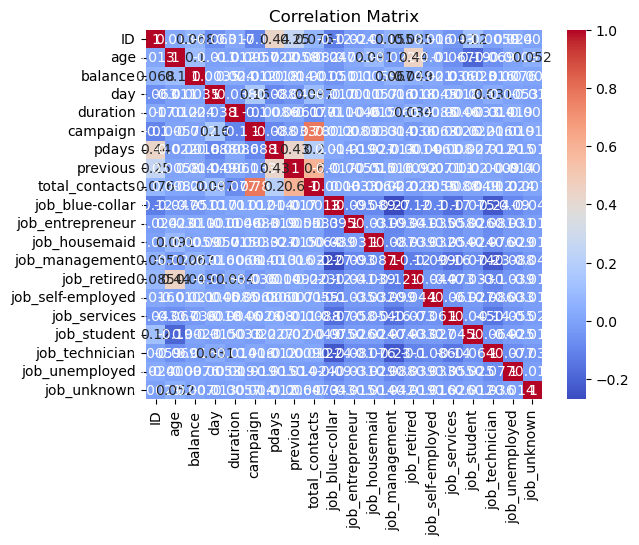

In [37]:
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Handle Imbalance.

In [38]:
#First ckecking calss distribution

In [39]:
train_df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Since "subscribed" column is in balance form no neede to handle imbalance or no need to do SOMOTE operation for balancing.

Feature Scaling.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_df[['age', 'duration']] = scaler.fit_transform(train_df[['age', 'duration']])

Model Building.

In [55]:
# It display the column names in your DataFrame to check for discrepancies
print(train_df.columns)

# Applying one-hot encoding only to existing categorical columns
columns_to_encode = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for col in columns_to_encode:
    if col in train_df.columns:
        train_df = pd.get_dummies(train_df, columns=[col], drop_first=True)

# Displaying the first few rows of the encoded dataset
print(train_df.head())

# Spliting the data into features (X) and target variable (y)
X = train_df.drop('subscribed', axis=1)
y = train_df['subscribed']

# Spliting the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


Index(['ID', 'age', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed', 'total_contacts',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')
      ID       age  balance  day  duration  campaign  pdays  previous  \
0  26110  1.415793     1933   19 -1.034788         2     -1         0   
1  40576 -0.937156        3   20 -0.789627         2     -1         0   
2  15320 -1.313627      891   18 -0.012415         1     -1         0   
3  43962  1.509911     3287   22  2.658274         1     84         3   
4  29842 -0.937156      119    4  0.717852         1     -1         0   

  subscribed  total_contacts  ...  month_jul  month_jun  month_mar  month_may  \
0         no               2 

LogisticRegression()

Accuracy Check.

In [56]:
#Evaluate model accuracy

In [57]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8807266982622433


Okay, since accuracy is good. Then I can go for the Future prediction with the BankMarketing_test.csv file.

# Prediction:-

In [61]:
#Load the test.csv dataset
test_df = pd.read_csv("BankMarketing_test.csv")

# Applying the same preprocessing steps to the test dataset as done for the training dataset

#Apply one-hot encoding to categorical columns
test_encoded_df = pd.get_dummies(test_df, columns=['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'], drop_first=True)

# Ensure the test dataset has the same columns as the training dataset
missing_columns = set(X.columns) - set(test_encoded_df.columns)
for column in missing_columns:
    test_encoded_df[column] = 0  # Add missing columns in test dataset with default value 0

# Ensure the column order is the same as the training dataset
test_encoded_df = test_encoded_df[X.columns]

# Now, you can make predictions using the trained model
test_predictions = model.predict(test_encoded_df)

# Display the predictions
print(test_predictions)

['yes' 'yes' 'yes' ... 'yes' 'yes' 'yes']
